In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
train_data = pd.read_csv('csv_files/train_sent_emo.csv')
val_data = pd.read_csv('csv_files/dev_sent_emo.csv')
test_data = pd.read_csv('csv_files/test_sent_emo.csv')

In [37]:
train_data['Utterance'] = train_data['Utterance'].str.replace('\x92', "'", regex=False)
val_data['Utterance'] = val_data['Utterance'].str.replace('\x92', "'", regex=False)
test_data['Utterance'] = test_data['Utterance'].str.replace('\x92', "'", regex=False)

## Naive Bayes

In [34]:
import glob
import librosa
import copy
import torch
import numpy as np
import seaborn as sns
from torch.utils.data import Dataset
import pandas as pd
from torch import nn
from tqdm import tqdm_notebook 
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
%pip install nltk

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

import nltk
from nltk import word_tokenize

In [ ]:
pipeline=Pipeline([
    ('bow',CountVectorizer(tokenizer=word_tokenize, token_pattern=None)),
    ('nb',MultinomialNB())
])

In [ ]:
pipeline.fit(train_data['Utterance'],train_data['Sentiment'])

preds_train=pipeline.predict(train_data['Utterance'])
preds_test=pipeline.predict(test_data['Utterance'])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_data['Sentiment'],preds_test))

In [ ]:
# Compute and plot the confusion matrix
cm = confusion_matrix(test_data['Sentiment'], preds_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Compute and plot the normalized confusion matrix
cm_norm = confusion_matrix(test_data['Sentiment'], preds_test, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap=plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()

## Logistic Regression

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [39]:
pipeline=Pipeline([
    ('tfidf',TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None, ngram_range=(1,5), max_features=1000)),
    ('logreg',LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [40]:
pipeline.fit(train_data['Utterance'],train_data['Sentiment'])

logs_preds_train=pipeline.predict(train_data['Utterance'])
logs_preds_test=pipeline.predict(test_data['Utterance'])

In [41]:
print(metrics.classification_report(test_data['Sentiment'],preds_test))

              precision    recall  f1-score   support

    negative       0.56      0.49      0.52       833
     neutral       0.71      0.71      0.71      1256
    positive       0.48      0.58      0.53       521

    accuracy                           0.61      2610
   macro avg       0.59      0.59      0.59      2610
weighted avg       0.62      0.61      0.62      2610



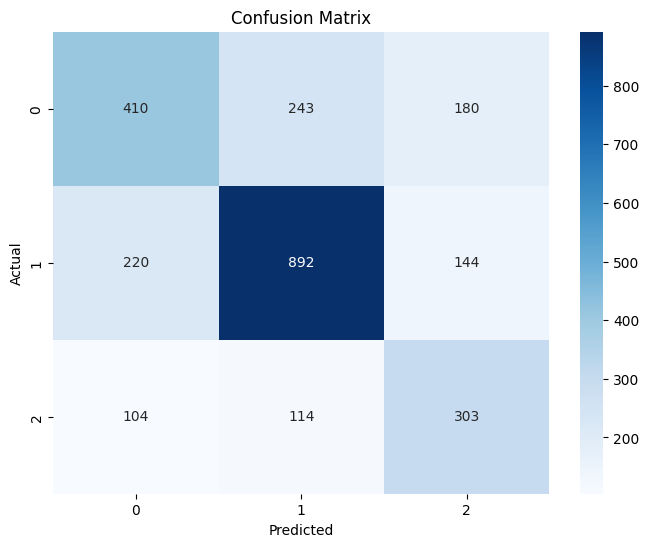

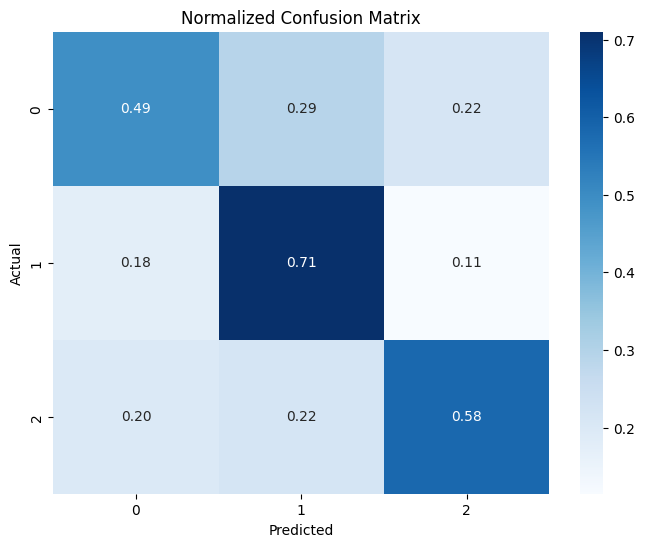

In [43]:
# Compute and plot the confusion matrix
cm = confusion_matrix(test_data['Sentiment'], logs_preds_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Compute and plot the normalized confusion matrix
cm_norm = confusion_matrix(test_data['Sentiment'], logs_preds_test, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap=plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()